# Bank Marketing using Machine Learning

## Introduction

### Predict Bank Term Deposit Subscription using Machine Learning

Marketing plays a pivotal role in the success of banking institutions, as they strive to reach potential clients effectively. Banks often rely on mediums like social media, digital platforms, customer service, and strategic partnerships to engage with customers. However, targeting specific demographics, locations, or social groups accurately remains a challenge.

With the advent of machine learning, banks now have the ability to leverage data and predictive analytics to refine their marketing strategies. By analyzing customer data, they can identify patterns and make data-driven decisions about which customers are more likely to subscribe to financial products. In this project, we explore how machine learning can help a Portuguese bank prioritize potential customers for a term deposit subscription based on past marketing data.

## Data Overview

The dataset used in this project originates from the direct marketing campaigns of a Portuguese banking institution. These campaigns were conducted via phone calls, and in many cases, multiple contacts were made with each client to determine whether they would subscribe to the bank's term deposit product.

- Number of Instances: 41188
- Number of Attributes: 20 + output attribute.

### Attribute Information:

#### Input Variables:

1. Bank client data:
   - **age** (numeric)
   - **job**: type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   - **marital**: marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   - **education** (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   - **default**: has credit in default? (categorical: "no","yes","unknown")
   - **housing**: has housing loan? (categorical: "no","yes","unknown")
   - **loan**: has personal loan? (categorical: "no","yes","unknown")
2. Related with the last contact of the current campaign:
   - **contact**: contact communication type (categorical: "cellular","telephone") 
   - **month**: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
   - **day_of_week**: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
   - **duration**: last contact duration, in seconds (numeric). <br>
                  Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). 
                  Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. 
                  Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
3. Other attributes:
   - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
   - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
   - **previous**: number of contacts performed before this campaign and for this client (numeric)
   - **poutcome**: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
4. Social and economic context attributes:
   - **emp.var.rate**: employment variation rate - quarterly indicator (numeric)
   - **cons.price.idx**: consumer price index - monthly indicator (numeric)
   - **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)
   - **euribor3m**: euribor 3 month rate - daily indicator (numeric)
   - **nr.employed**: number of employees - quarterly indicator (numeric)

#### Output Variable (Desired Target):

- **y**: has the client subscribed to a term deposit? (binary: "yes","no")

## Goal

The classification goal is to predict if the client will subscribe a term deposit (variable y).

## Objective

In this project, we aim to build a machine learning model that can predict whether a client will subscribe to a term deposit. We will follow the steps outlined below:

1. Exploratory Data Analysis
2. Data Preprocessing & Feature Engineering
3. Model Selection: Baseline Models
4. Analyze Model Performance on Baseline Models
5. Hyperparameter Tuning
6. Model Evaluation
7. Conclusion

## Data Preparation

In [1]:
import pandas as pd

df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep=';')
print("Number of samples: ", len(df))

Number of samples:  41188


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Count the number of samples in each class
df['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

This indicates that the dataset is imbalanced, with the majority of clients not subscribing to a term deposit. We will need to address this imbalance during data preprocessing.

In [5]:
# Convert the class labels to binary values in a new column 'Y_LABEL'
df['Y_LABEL'] = (df.y == 'yes').astype(int)

In [6]:
# Calculate the percentage of class samples
def calculate_prevalence(y):
    return sum(y) / len(y)

In [7]:
# Percentage of positive samples
print("Prevalence for class 1: ", calculate_prevalence(df['Y_LABEL']))

# Percentage of negative samples
print("Prevalence for class 0: ", 1 - calculate_prevalence(df['Y_LABEL']))

Prevalence for class 1:  0.11265417111780131
Prevalence for class 0:  0.8873458288821987


This means that the prevalence of the majority class ('NO') is 88.73%, while the prevalence of the minority class ('YES') is 11.27%.

## Exploratory Data Analysis

In [8]:
# Displaying the first 10 columns of the dataset
df[list(df.columns)[:10]].head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon
1,57,services,married,high.school,unknown,no,no,telephone,may,mon
2,37,services,married,high.school,no,yes,no,telephone,may,mon
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon
4,56,services,married,high.school,no,no,yes,telephone,may,mon


In [9]:
# Displaying the last columns of the dataset
df[list(df.columns)[10:]].head()

,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Y_LABEL
0,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [10]:
# Total number of columns
print("Number of columns: ", len(df.columns))

Number of columns:  22


In [11]:
# print the number of unique values in each column and if it is less than 30 print the unique values
for col in df.columns:
    print(col, df[col].nunique())
    if df[col].nunique() < 30:
        print(df[col].unique())
    print('-----------------------')

age 78
-----------------------
job 12
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
-----------------------
marital 4
['married' 'single' 'divorced' 'unknown']
-----------------------
education 8
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
-----------------------
default 3
['no' 'unknown' 'yes']
-----------------------
housing 3
['no' 'yes' 'unknown']
-----------------------
loan 3
['no' 'yes' 'unknown']
-----------------------
contact 2
['telephone' 'cellular']
-----------------------
month 10
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
-----------------------
day_of_week 5
['mon' 'tue' 'wed' 'thu' 'fri']
-----------------------
duration 1544
-----------------------
campaign 42
-----------------------
pdays 27
[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18 

In [12]:
# Print the numerical and categorical columns excluding output and output label columns
num_col = df.select_dtypes(include=['int64', 'float64']).columns
cat_col = df.select_dtypes(include=['object']).columns

print("Numerical columns: ", num_col)
print("Categorical columns: ", cat_col)

Numerical columns:  Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'Y_LABEL'],
      dtype='object')
Categorical columns:  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


Discarding the 'duration' column, since this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

## Feature Engineering

### Numerical Features

In [13]:
num_col = num_col.drop('Y_LABEL')

print(num_col)

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [14]:
# Removing the 'duration' column from the numerical columns
num_col = num_col.drop('duration')

print(num_col)

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [15]:
df[num_col].head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [16]:
df[num_col].describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [17]:
# Checking missing values in the numeric columns
df[num_col].isnull().sum()

age               0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

#### Graphical Representation

Text(0.5, 1.0, 'Age Count Distribution')

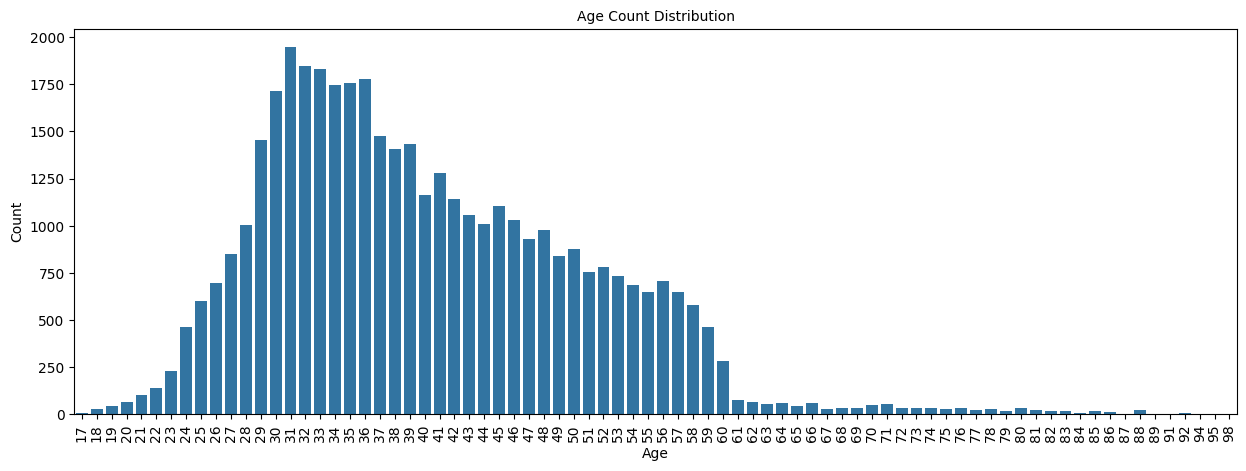

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
sns.countplot(x = 'age', data = df)
plt.xticks(rotation=90)
plt.xlabel('Age', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Age Count Distribution', fontsize=10)

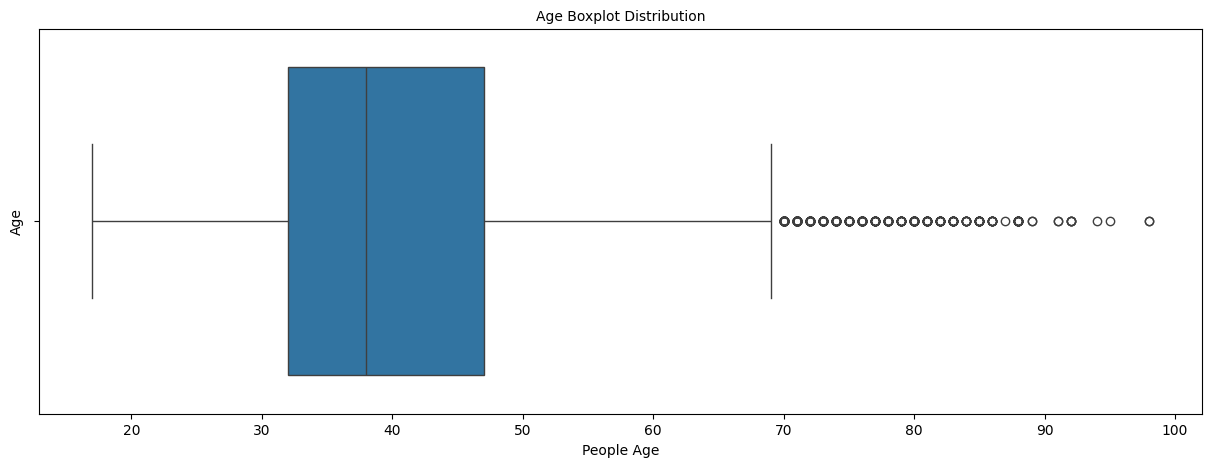

In [19]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='age', data=df[num_col])
plt.xlabel('People Age', fontsize=10)
plt.ylabel('Age', fontsize=10)
plt.title('Age Boxplot Distribution', fontsize=10)
plt.tick_params(labelsize=10)

plt.show()

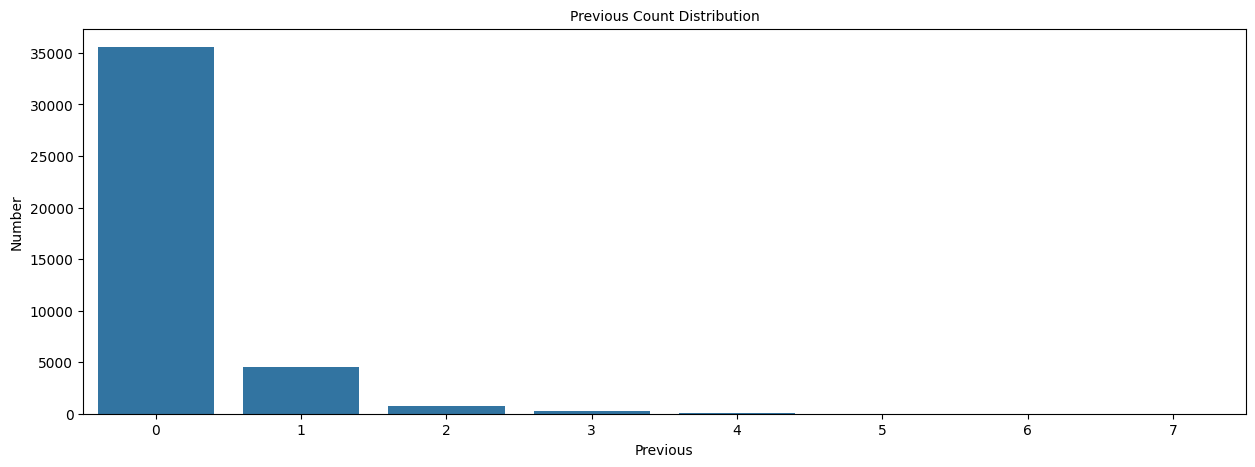

In [20]:
plt.figure(figsize=(15, 5))
sns.countplot(x='previous', data=df[num_col])
plt.xlabel('Previous', fontsize=10)
plt.ylabel('Number', fontsize=10)
plt.title('Previous Count Distribution', fontsize=10)
plt.tick_params(labelsize=10)
plt.show()

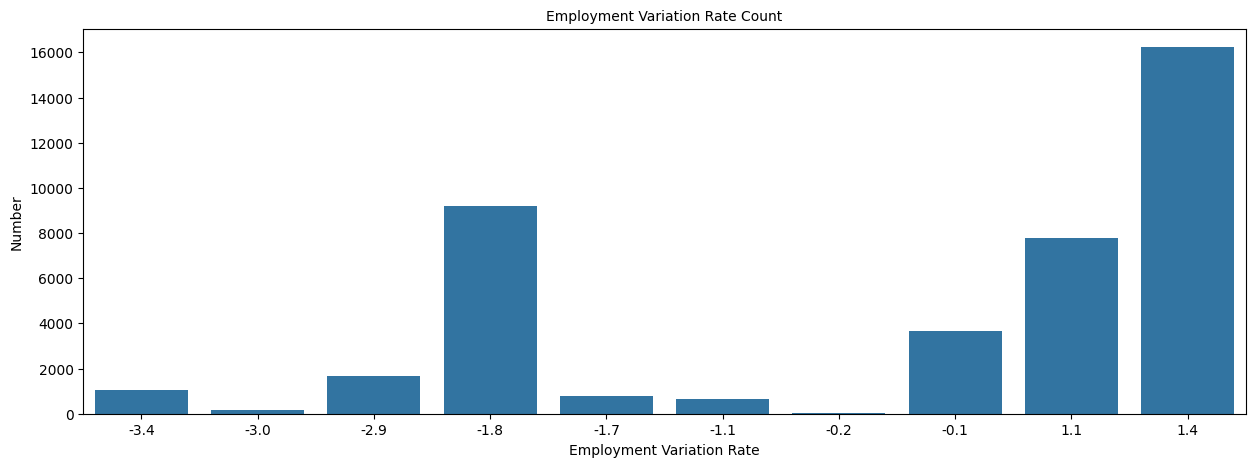

In [21]:
plt.figure(figsize=(15, 5))
sns.countplot(x='emp.var.rate', data=df[num_col])
plt.xlabel('Employment Variation Rate', fontsize=10)
plt.ylabel('Number', fontsize=10)
plt.title('Employment Variation Rate Count', fontsize=10)
plt.tick_params(labelsize=10)
plt.show()


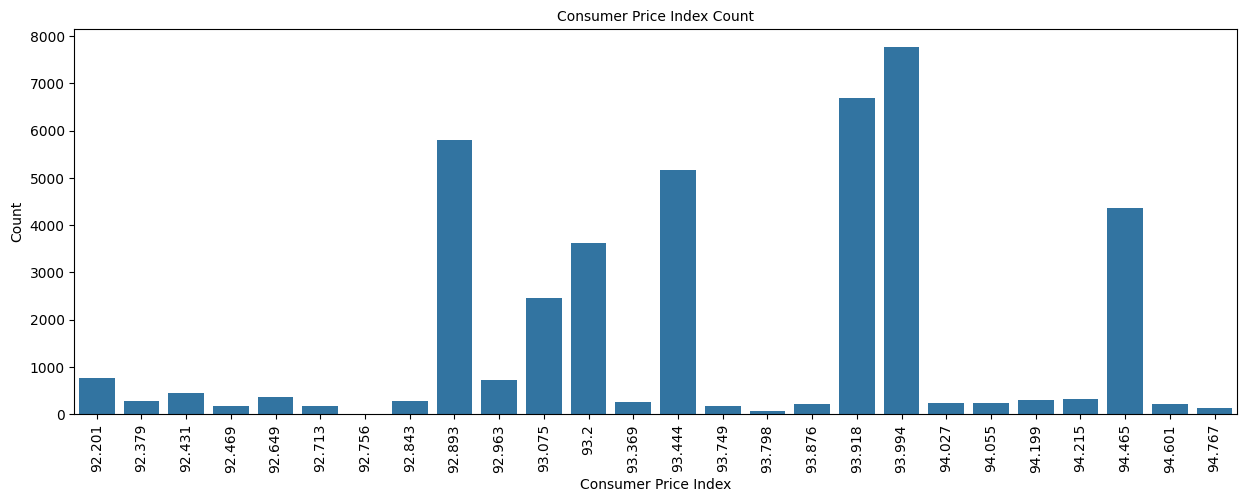

In [22]:
plt.figure(figsize=(15, 5))
sns.countplot(x='cons.price.idx', data=df[num_col])
plt.xlabel('Consumer Price Index', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Consumer Price Index Count', fontsize=10)
plt.tick_params(labelsize=10)
plt.xticks(rotation=90)
plt.show()

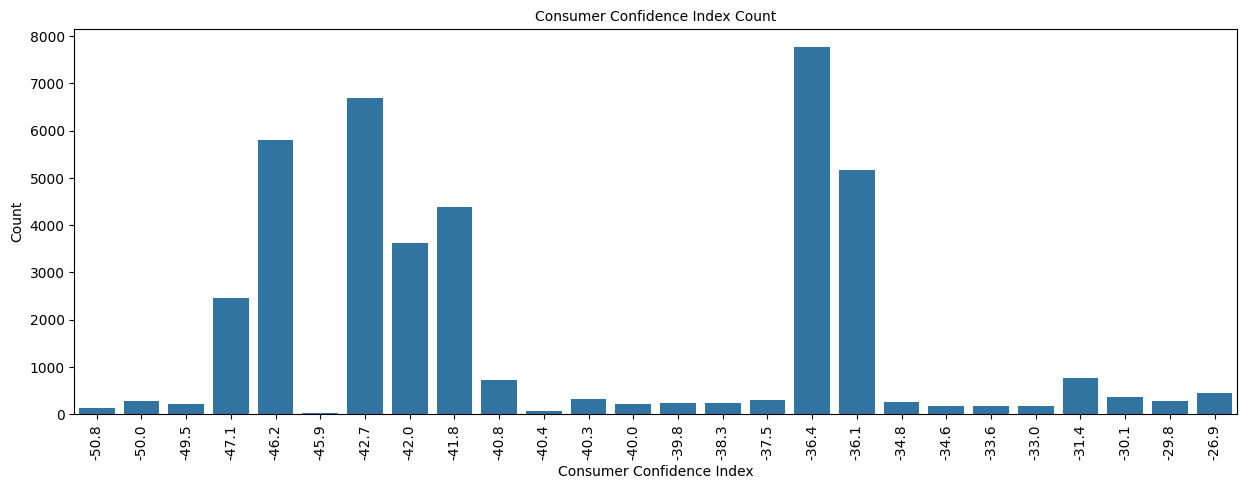

In [23]:
plt.figure(figsize=(15, 5))
sns.countplot(x='cons.conf.idx', data=df[num_col])
plt.xlabel('Consumer Confidence Index', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Consumer Confidence Index Count', fontsize=10)
plt.tick_params(labelsize=10)
plt.xticks(rotation=90)
plt.show()

### Categorical Features

In [24]:
cat_col = cat_col.drop('y')

print(cat_col)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')


In [25]:
df[cat_col].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [26]:
# Checking missing values in the categorical columns
df[cat_col].isnull().sum()

job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
poutcome       0
dtype: int64

In [27]:
# printing the unique values in the categorical columns
for col in cat_col:
    print('-----------------------')
    print(col, "(", len(df[col].unique()), ")", df[col].unique())    

-----------------------
job ( 12 ) ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
-----------------------
marital ( 4 ) ['married' 'single' 'divorced' 'unknown']
-----------------------
education ( 8 ) ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
-----------------------
default ( 3 ) ['no' 'unknown' 'yes']
-----------------------
housing ( 3 ) ['no' 'yes' 'unknown']
-----------------------
loan ( 3 ) ['no' 'yes' 'unknown']
-----------------------
contact ( 2 ) ['telephone' 'cellular']
-----------------------
month ( 10 ) ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
-----------------------
day_of_week ( 5 ) ['mon' 'tue' 'wed' 'thu' 'fri']
-----------------------
poutcome ( 3 ) ['nonexistent' 'failure' 'success']


#### Encoding Categorical Features

We have used the One-Hot Encoding technique to encode the categorical features. This technique creates a binary column for each category and returns a matrix with a binary column for each category.

In [28]:
new_cat_col = pd.get_dummies(df[cat_col], drop_first=False).astype(int)
new_cat_col.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


#### Graphical Representation

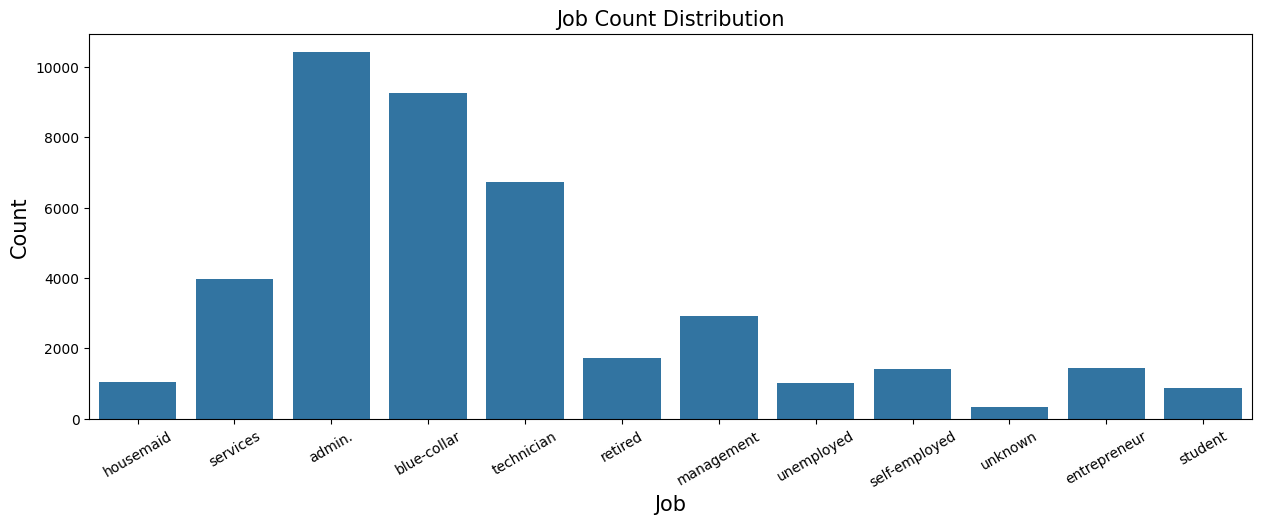

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
sns.countplot(x='job', data=df[cat_col])
plt.xlabel('Job', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Job Count Distribution', fontsize=15)
plt.xticks(rotation=30)
plt.show()

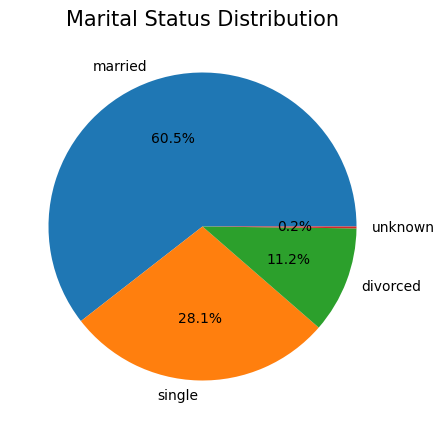

In [30]:
# Plot the pie chart for the 'marital' column
plt.figure(figsize=(10, 5))
df['marital'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Marital Status Distribution', fontsize=15)
plt.ylabel('')
plt.show()

<Figure size 1500x500 with 0 Axes>

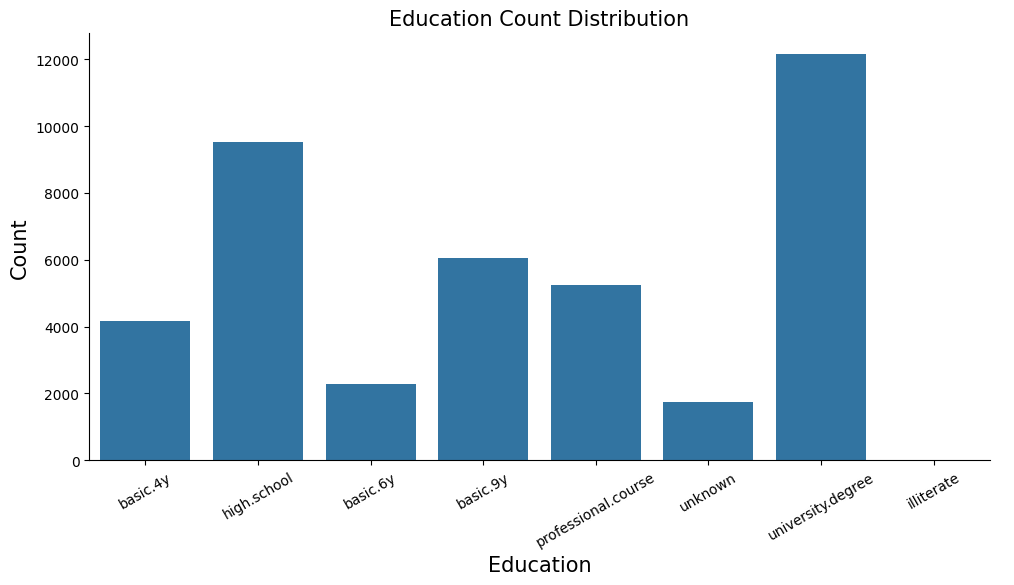

In [31]:
plt.figure(figsize=(15, 5))
sns.catplot(x='education', data=df, kind='count', aspect=2)
plt.xlabel('Education', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Education Count Distribution', fontsize=15)
plt.xticks(rotation=30)
plt.show()

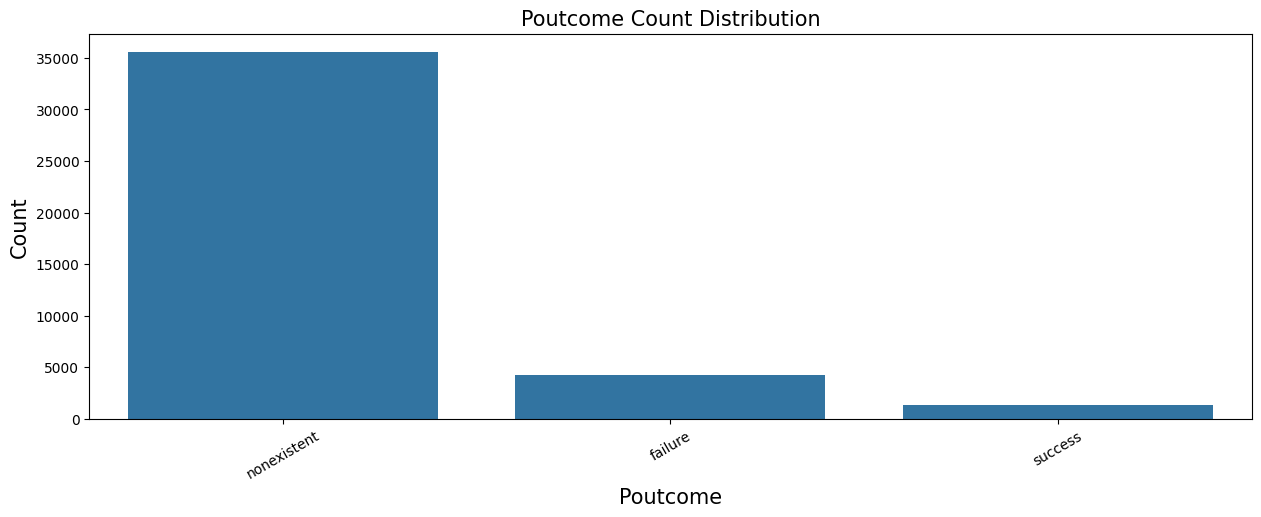

In [32]:
plt.figure(figsize=(15, 5))
sns.countplot(x='poutcome', data=df)
plt.xlabel('Poutcome', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Poutcome Count Distribution', fontsize=15)
plt.xticks(rotation=30)
plt.show()

<Figure size 640x480 with 0 Axes>

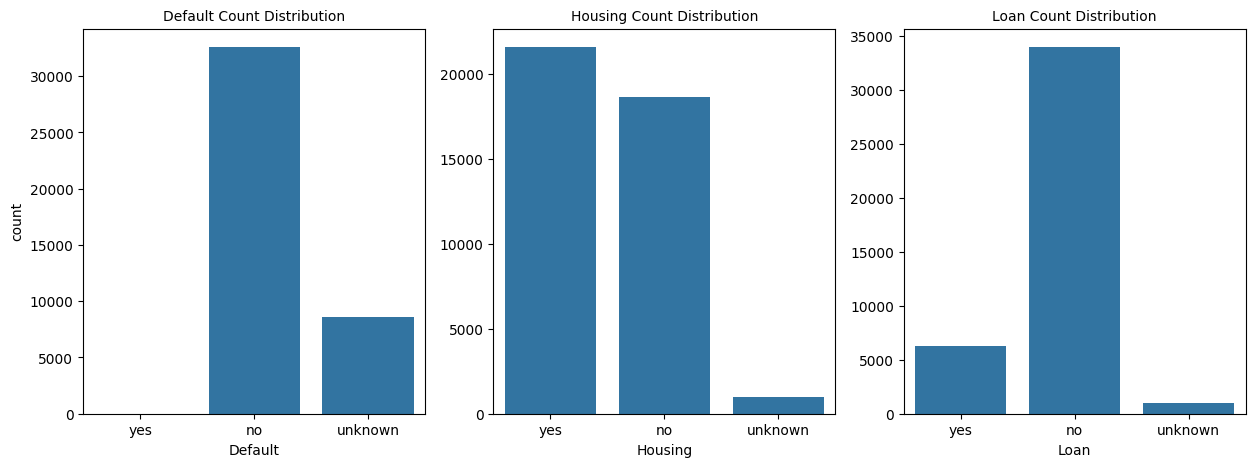

In [33]:
# Add space between the figures
plt.subplots_adjust(wspace=1)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(x='default', data=df[cat_col], ax=ax1, order=['yes', 'no', 'unknown'])
ax1.set_xlabel('Default', fontsize=10)
ax1.set_title('Default Count Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.countplot(x='housing', data=df[cat_col], ax=ax2, order=['yes', 'no', 'unknown'])
ax2.set_xlabel('Housing', fontsize=10)
ax2.set_ylabel('', fontsize=10)
ax2.set_title('Housing Count Distribution', fontsize=10)
ax2.tick_params(labelsize=10)

sns.countplot(x='loan', data=df[cat_col], ax=ax3, order=['yes', 'no', 'unknown'])
ax3.set_xlabel('Loan', fontsize=10)
ax3.set_ylabel('', fontsize=10)
ax3.set_title('Loan Count Distribution', fontsize=10)
ax3.tick_params(labelsize=10)

plt.show()

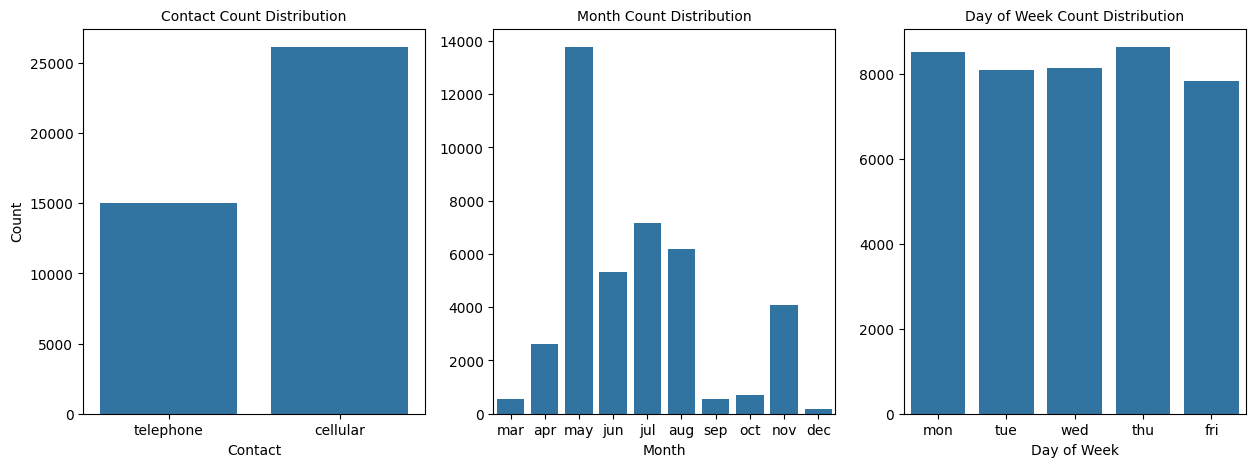

In [34]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(x='contact', data=df[cat_col], ax=ax1)
ax1.set_xlabel('Contact', fontsize=10)
ax1.set_ylabel('Count', fontsize=10)
ax1.set_title('Contact Count Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.countplot(x='month', data=df[cat_col], ax=ax2, order=['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Month', fontsize=10)
ax2.set_ylabel('', fontsize=10)
ax2.set_title('Month Count Distribution', fontsize=10)
ax2.tick_params(labelsize=10)

sns.countplot(x='day_of_week', data=df[cat_col], ax=ax3)
ax3.set_xlabel('Day of Week', fontsize=10)
ax3.set_ylabel('', fontsize=10)
ax3.set_title('Day of Week Count Distribution', fontsize=10)
ax3.tick_params(labelsize=10)

plt.show()

In [35]:
new_num_col = num_col.to_list() + ['Y_LABEL']

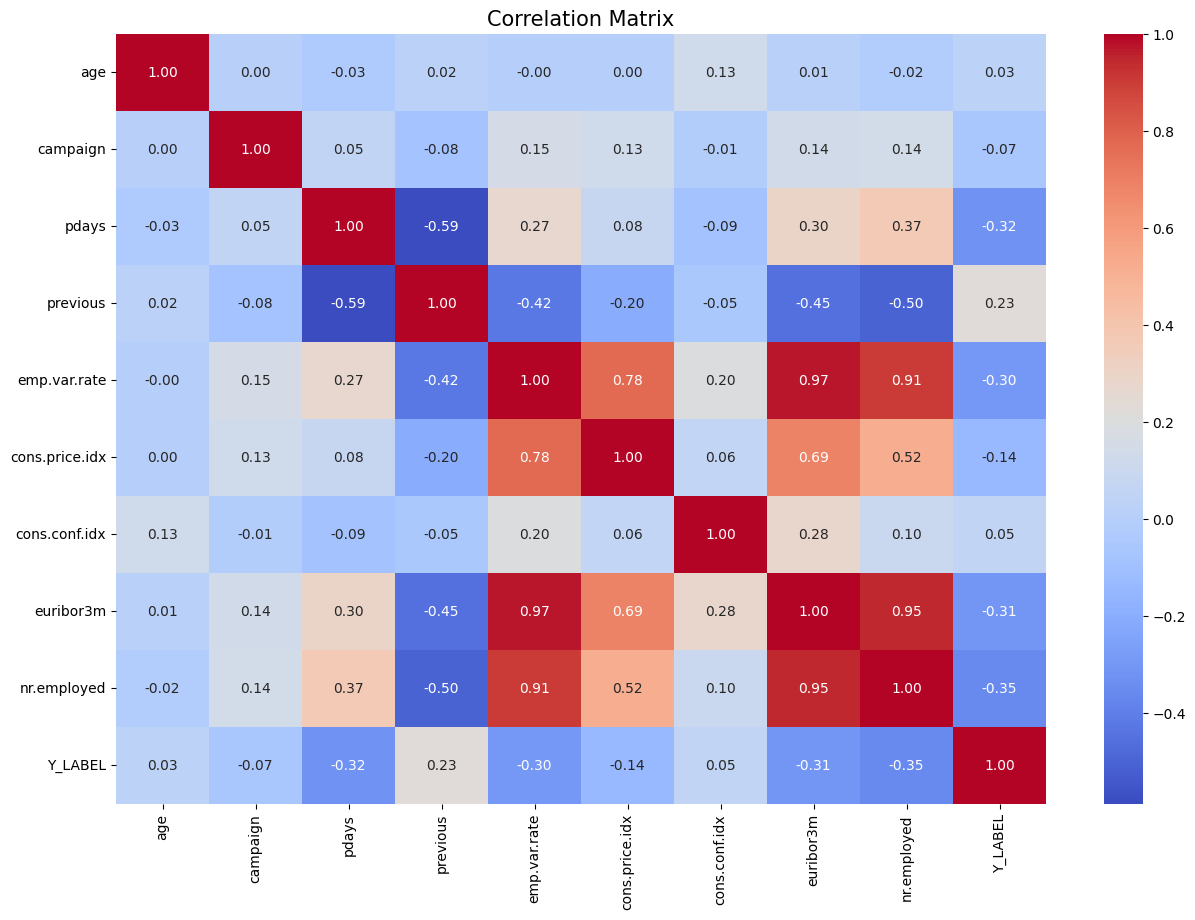

In [36]:
# Plotting the correlation matrix for the numerical columns
plt.figure(figsize=(15, 10))
sns.heatmap(df[new_num_col].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix', fontsize=15)
plt.show()

Adding the encoded categorical features to the dataset.

In [37]:
df = pd.concat([df, new_cat_col], axis=1)
all_cat_col = list(new_cat_col.columns)
df[all_cat_col].head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


Summary of Feature Engineering:

In [38]:
print("Total Number of features: ", len(all_cat_col) + len(num_col))
print("Number of categorical features: ", len(all_cat_col))
print("Number of numerical features: ", len(num_col))

Total Number of features:  62
Number of categorical features:  53
Number of numerical features:  9


Checking for missing values in the new dataset.

In [39]:
df[num_col.to_list() + all_cat_col].isnull().sum().sort_values(ascending=False)

age                     0
campaign                0
pdays                   0
previous                0
emp.var.rate            0
                       ..
day_of_week_tue         0
day_of_week_wed         0
poutcome_failure        0
poutcome_nonexistent    0
poutcome_success        0
Length: 62, dtype: int64

In [40]:
input_cols = num_col.tolist() + all_cat_col
new_df = df[input_cols + ['Y_LABEL']]

In [41]:
input_cols

['age',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',

In [42]:
len(input_cols)

62

In [43]:
new_df.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Y_LABEL
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0


#### Splitting the Data into Training, Validation, and Test Sets

The data is split into training, validation, and test sets using a 70-15-15 split ratio.

**Training Set**: 70% (28831 instances)\
**Validation Set**: 15% (6177 instances)\
**Test Set**: 15% (6180 instances)

In [44]:
# Shuffling the dataset
new_df = new_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [45]:
# 30% of the testing and validation data round to 3 decimal places
df_valid_test = new_df.sample(frac=0.30, random_state=42)
print("Split size of validation and test data: ", round(len(df_valid_test) / len(new_df), 3))

Split size of validation and test data:  0.3


Splitting into validation and test sets of 15% each.

In [46]:
df_test = df_valid_test.sample(frac=0.5, random_state=42)
df_valid = df_valid_test.drop(df_test.index)

In [47]:
df_complete_train = new_df.drop(df_valid_test.index)

In [48]:
# Prevalence of the training, validation, and testing data
print("Training prevalence: ", calculate_prevalence(df_complete_train['Y_LABEL']))
print("Validation prevalence: ", calculate_prevalence(df_valid['Y_LABEL']))
print("Testing prevalence: ", calculate_prevalence(df_test['Y_LABEL']))

Training prevalence:  0.1122364039955605
Validation prevalence:  0.11314341210747815
Testing prevalence:  0.11411460019423762


We need to create a balanced dataset for training the model. We will only sample similar number of 'YES' and 'NO' instances from the training set.

#### Balancing the training set.

In [49]:
positives_rows = df_complete_train['Y_LABEL'] == 1
df_train_positives = df_complete_train.loc[positives_rows]
df_train_negatives = df_complete_train.loc[~positives_rows]

df_train = pd.concat([df_train_positives, df_train_negatives.sample(n=len(df_train_positives), random_state=42)], axis=0)

df_train = df_train.sample(frac=1, random_state=42).reset_index(drop=True)

print("Balanced Training prevalence:", calculate_prevalence(df_train['Y_LABEL']))

Balanced Training prevalence: 0.5


#### Balancing the validation set.

In [50]:
positives_rows = df_valid['Y_LABEL'] == 1
df_valid_positives = df_valid.loc[positives_rows]
df_valid_negatives = df_valid.loc[~positives_rows]

df_valid = pd.concat([df_valid_positives, df_valid_negatives.sample(n=len(df_valid_positives), random_state=42)], axis=0)

df_valid = df_valid.sample(frac=1, random_state=42).reset_index(drop=True)

print("Balanced Validation prevalence:", calculate_prevalence(df_valid['Y_LABEL']))

Balanced Validation prevalence: 0.5


#### Balancing the test set.

In [51]:
positives_rows = df_test['Y_LABEL'] == 1
df_test_positives = df_test.loc[positives_rows]
df_test_negatives = df_test.loc[~positives_rows]

df_test = pd.concat([df_test_positives, df_test_negatives.sample(n=len(df_test_positives), random_state=42)], axis=0)

df_test = df_test.sample(frac=1, random_state=42).reset_index(drop=True)

print("Balanced Testing prevalence:", calculate_prevalence(df_test['Y_LABEL']))

Balanced Testing prevalence: 0.5


In [52]:
# New number of samples in the training, validation, and testing data
print("Number of training samples: ", len(df_train))
print("Number of validation samples: ", len(df_valid))
print("Number of testing samples: ", len(df_test))

Number of training samples:  6472
Number of validation samples:  1398
Number of testing samples:  1410


In [53]:
# Saving all 4 dataframes into separate CSV files
df_complete_train.to_csv('data/balanced/train_complete.csv', index=False)
df_train.to_csv('data/balanced/train.csv', index=False)
df_valid.to_csv('data/balanced/valid.csv', index=False)
df_test.to_csv('data/balanced/test.csv', index=False)

In [54]:
import pickle

pickle.dump(input_cols, open('data/balanced/input_cols.sav', 'wb'))

Fill the missing values in any column with the mean of that column.

In [55]:
def fill_missing_values(df, df_mean, col2use):
    for c in col2use:
        assert c in df.columns, c + ' not in df'
        assert c in df_mean.col.values, c+ 'not in df_mean'
    
    for c in col2use:
        mean_value = df_mean.loc[df_mean.col == c,'mean_val'].values[0]
        df[c] = df[c].fillna(mean_value)
    return df

In [56]:
df_mean = df_complete_train[input_cols].mean(axis=0)
df_mean.to_csv('data/balanced/df_mean.csv')

In [57]:
df_mean_in = pd.read_csv('data/balanced/df_mean.csv', names=['col', 'mean_val'])
df_mean_in.head()

,col,mean_val
0,NaN,0.000000
1,age,40.023585
2,campaign,2.552442
3,pdays,962.352456
4,previous,0.173037


In [58]:
df_complete_train = fill_missing_values(df_complete_train, df_mean_in, input_cols)
df_train = fill_missing_values(df_train, df_mean_in, input_cols)
df_valid = fill_missing_values(df_valid, df_mean_in, input_cols)

In [59]:
# Create X and y matrices
X_train = df_train[input_cols].values
X_complete_train = df_complete_train[input_cols].values
X_valid = df_valid[input_cols].values

y_train = df_train['Y_LABEL'].values
y_valid = df_valid['Y_LABEL'].values

print("Complete Training Data Shape: ", X_complete_train.shape)
print("Training Data Shape: ", X_train.shape, y_train.shape)
print("Validation Data Shape: ", X_valid.shape, y_valid.shape)

Complete Training Data Shape:  (28832, 62)
Training Data Shape:  (6472, 62) (6472,)
Validation Data Shape:  (1398, 62) (1398,)


Create a scaler, save it and scale the X dataset.

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_complete_train)

StandardScaler()

In [61]:
scalerfile = 'data/balanced/scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [62]:
scaler = pickle.load(open(scalerfile, 'rb'))

In [63]:
X_train_trasnform = scaler.transform(X_train)
X_valid_transform = scaler.transform(X_valid)

## Model Selection

Testing various machine learning models to evaluate their performance on the dataset and see how the independent variables accurately predict the dependent variable. Then we will select the best model based on performance on the validation set. 

In [64]:
# Helper function to calculate the metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def calculate_specificity(y_true, y_pred, thres):
    return sum((y_pred < thres) & (y_true == 0)) / sum(y_true == 0)

def generate_metrics(y_true, y_pred, thres):
    accuracy = accuracy_score(y_true, (y_pred > thres))
    recall = recall_score(y_true, (y_pred > thres))
    precision = precision_score(y_true, (y_pred > thres))
    specificity = calculate_specificity(y_true, y_pred, thres)
    f1 = f1_score(y_true, (y_pred > thres))
    auc = roc_auc_score(y_true, y_pred)
    
    # Generate the report in tabular format
    print('Accuracy:', round(accuracy, 3))
    print('Recall:', round(recall, 3))
    print('Precision:', round(precision, 3))
    print('Specificity:', round(specificity, 3))
    print('F1 Score:', round(f1, 3))
    print('AUC:', round(auc, 3))
    print("\n")
    
    return accuracy, recall, precision, specificity, f1, auc
    

In [65]:
threshold = 0.5

#### Baseline Models: 

We will evaluate the following baseline models:

1. Logistic Regression
2. Random Forest Classifier
3. K Nearest Neighbors Classifier
4. Gradient Boosting Classifier

##### Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
lr.fit(X_train_trasnform, y_train)

LogisticRegression(random_state=42)

In [67]:
y_train_preds = lr.predict_proba(X_train_trasnform)[:, 1]
y_valid_preds = lr.predict_proba(X_valid_transform)[:, 1]

print("Logistic Regression\n\n")

print("Training: ")
lr_train_acc, lr_train_recall, lr_train_precision, lr_train_specificity, lr_train_f1, lr_train_auc = generate_metrics(y_train, y_train_preds, threshold)

print("Validation: ")
lr_valid_acc, lr_valid_recall, lr_valid_precision, lr_valid_specificity, lr_valid_f1, lr_valid_auc = generate_metrics(y_valid, y_valid_preds, threshold)

Logistic Regression


Training: 
Accuracy: 0.744
Recall: 0.633
Precision: 0.814
Specificity: 0.856
F1 Score: 0.712
AUC: 0.797


Validation: 
Accuracy: 0.747
Recall: 0.632
Precision: 0.822
Specificity: 0.863
F1 Score: 0.715
AUC: 0.798




##### Random Forest Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=10, random_state=42)
rf.fit(X_train_trasnform, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [69]:
y_train_preds = rf.predict_proba(X_train_trasnform)[:, 1]
y_valid_preds = rf.predict_proba(X_valid_transform)[:, 1]

print("Random Forest\n\n")

print("Training: ")
rf_train_acc, rf_train_recall, rf_train_precision, rf_train_specificity, rf_train_f1, rf_train_auc = generate_metrics(y_train, y_train_preds, threshold)

print("Validation: ")
rf_valid_acc, rf_valid_recall, rf_valid_precision, rf_valid_specificity, rf_valid_f1, rf_valid_auc = generate_metrics(y_valid, y_valid_preds, threshold)

Random Forest


Training: 
Accuracy: 0.771
Recall: 0.65
Precision: 0.858
Specificity: 0.892
F1 Score: 0.739
AUC: 0.882


Validation: 
Accuracy: 0.759
Recall: 0.645
Precision: 0.835
Specificity: 0.873
F1 Score: 0.728
AUC: 0.795




##### K Nearest Neighbors Classifier

In [70]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train_trasnform, y_train)

KNeighborsClassifier(n_neighbors=100)

In [71]:
y_train_preds = knn.predict_proba(X_train_trasnform)[:, 1]
y_valid_preds = knn.predict_proba(X_valid_transform)[:, 1]

print("K-Nearest Neighbors\n\n")

print("Training: ")
knn_train_acc, knn_train_recall, knn_train_precision, knn_train_specificity, knn_train_f1, knn_train_auc = generate_metrics(y_train, y_train_preds, threshold)

print("Validation: ")
knn_valid_acc, knn_valid_recall, knn_valid_precision, knn_valid_specificity, knn_valid_f1, knn_valid_auc = generate_metrics(y_valid, y_valid_preds, threshold)

K-Nearest Neighbors


Training: 
Accuracy: 0.734
Recall: 0.604
Precision: 0.817
Specificity: 0.858
F1 Score: 0.694
AUC: 0.797


Validation: 
Accuracy: 0.741
Recall: 0.601
Precision: 0.835
Specificity: 0.878
F1 Score: 0.699
AUC: 0.779




##### Gradient Boosting Classifier

In [72]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=3, random_state=42)
gb = gb.fit(X_train_trasnform, y_train)

In [73]:
y_train_preds = gb.predict_proba(X_train_trasnform)[:, 1]
y_valid_preds = gb.predict_proba(X_valid_transform)[:, 1]

print("Gradient Boosting\n\n")

print("Training: ")
gb_train_acc, gb_train_recall, gb_train_precision, gb_train_specificity, gb_train_f1, gb_train_auc = generate_metrics(y_train, y_train_preds, threshold)

print("Validation: ")
gb_valid_acc, gb_valid_recall, gb_valid_precision, gb_valid_specificity, gb_valid_f1, gb_valid_auc = generate_metrics(y_valid, y_valid_preds, threshold)

Gradient Boosting


Training: 
Accuracy: 0.82
Recall: 0.766
Precision: 0.86
Specificity: 0.875
F1 Score: 0.81
AUC: 0.9


Validation: 
Accuracy: 0.721
Recall: 0.684
Precision: 0.739
Specificity: 0.758
F1 Score: 0.71
AUC: 0.777




## Analyze Model Performance on Baseline Models

Creating a dataframe to compare the performance of the baseline models. Area under the ROC curve (AUC) is used as the evaluation metric. 

In [74]:
results = pd.DataFrame({'Classifier': ['LR', 'LR', 'RF', 'RF', 'KNN', 'KNN', 'GB', 'GB'],
                        'Dataset': ['Training', 'validation'] * 4,
                        'Accuracy': [lr_train_acc, lr_valid_acc, rf_train_acc, rf_valid_acc, knn_train_acc, knn_valid_acc, gb_train_acc, gb_valid_acc],
                        'Recall': [lr_train_recall, lr_valid_recall, rf_train_recall, rf_valid_recall, knn_train_recall, knn_valid_recall, gb_train_recall, gb_valid_recall],
                        'Precision': [lr_train_precision, lr_valid_precision, rf_train_precision, rf_valid_precision, knn_train_precision, knn_valid_precision, gb_train_precision, gb_valid_precision],
                        'Specificity': [lr_train_specificity, lr_valid_specificity, rf_train_specificity, rf_valid_specificity, knn_train_specificity, knn_valid_specificity, gb_train_specificity, gb_valid_specificity],
                        'F1': [lr_train_f1, lr_valid_f1, rf_train_f1, rf_valid_f1, knn_train_f1, knn_valid_f1, gb_train_f1, gb_valid_f1],
                        'AUC': [lr_train_auc, lr_valid_auc, rf_train_auc, rf_valid_auc, knn_train_auc, knn_valid_auc, gb_train_auc, gb_valid_auc]})

results

,Classifier,Dataset,Accuracy,Recall,Precision,Specificity,F1,AUC
0,LR,Training,0.744283,0.632880,0.814314,0.855686,0.712224,0.796601
1,LR,validation,0.747496,0.632332,0.821561,0.862661,0.714632,0.798078
2,RF,Training,0.771014,0.649876,0.857667,0.892151,0.739451,0.882496
3,RF,validation,0.758941,0.645207,0.835185,0.872675,0.728006,0.795026
4,KNN,Training,0.734085,0.603832,0.816548,0.858158,0.694262,0.796957
5,KNN,validation,0.741059,0.600858,0.834990,0.878398,0.698835,0.779366
6,GB,Training,0.820457,0.765760,0.859820,0.875155,0.810069,0.899603
7,GB,validation,0.721030,0.683834,0.738794,0.758226,0.710253,0.776746


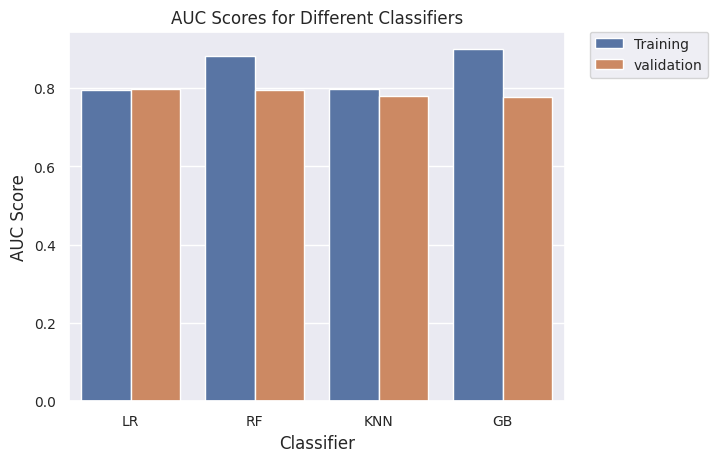

<Figure size 640x480 with 0 Axes>

In [104]:
# Plotting the results
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='darkgrid')

sns.barplot(x='Classifier', y='AUC', hue='Dataset', data=results)
plt.title('AUC Scores for Different Classifiers')
plt.ylabel('AUC Score')
plt.xlabel('Classifier')
plt.tick_params(labelsize=10)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=10)
plt.show()

plt.savefig('data/balanced/auc_scores.png')

## Hyperparameter Tuning

Hyperparamter tuning manually for RandomForrestClassifier.

In [76]:
max_depths = np.arange(2, 20, 2)

train_aucs = np.zeros(len(max_depths))
valid_aucs = np.zeros(len(max_depths))

for i in range(len(max_depths)):
    rf = RandomForestClassifier(max_depth=max_depths[i], random_state=42)
    rf.fit(X_train_trasnform, y_train)
    
    y_train_preds = rf.predict_proba(X_train_trasnform)[:, 1]
    y_valid_preds = rf.predict_proba(X_valid_transform)[:, 1]
    
    train_aucs[i] = roc_auc_score(y_train, y_train_preds)
    valid_aucs[i] = roc_auc_score(y_valid, y_valid_preds)

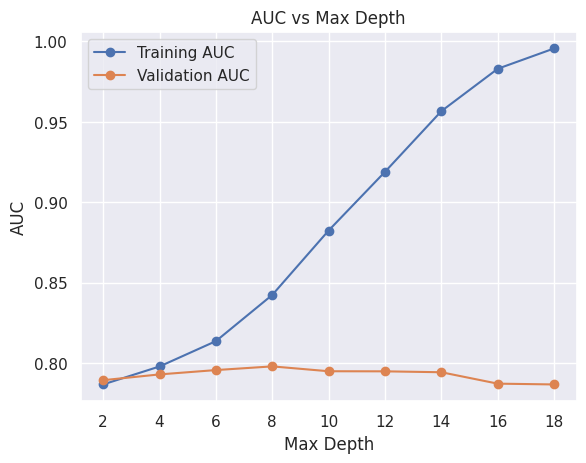

In [77]:
import matplotlib.pyplot as plt

plt.plot(max_depths, train_aucs, 'o-', label='Training AUC')
plt.plot(max_depths, valid_aucs, 'o-', label='Validation AUC')

plt.xlabel('Max Depth')
plt.ylabel('AUC')
plt.legend()
plt.title('AUC vs Max Depth')
plt.show()

### Randomized Search Cross Validation

#### Optimizing Random Forest Classifier

In [78]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': np.int64(18),
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [79]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = range(200, 1000, 200)
max_features = ['auto', 'sqrt']
max_depth = range(2, 20, 2)
min_samples_split = range(2, 10, 2)
criterion = ['gini', 'entropy']

random_grid_rf = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'criterion': criterion}
print(random_grid_rf)

{'n_estimators': range(200, 1000, 200), 'max_features': ['auto', 'sqrt'], 'max_depth': range(2, 20, 2), 'min_samples_split': range(2, 10, 2), 'criterion': ['gini', 'entropy']}


In [80]:
from sklearn.metrics import make_scorer, roc_auc_score
auc_scoring = make_scorer(roc_auc_score)

In [81]:
rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid_rf, n_iter=20,
                               cv=2, verbose=1, random_state=42, scoring=auc_scoring)

In [82]:
import time

t1 = time.time()
rf_random.fit(X_train_trasnform, y_train)
t2 = time.time()
print("Time taken: ", t2 - t1)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


/home/amit/.pyenv/versions/sdh/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
12 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/home/amit/.pyenv/versions/sdh/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/amit/.pyenv/versions/sdh/lib/python3.12/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/home/amit/.pyenv/versions/sdh/lib/python3.12/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_parame

Time taken:  44.74625635147095


In [83]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'max_features': 'sqrt',
 'max_depth': 8,
 'criterion': 'entropy'}

In [84]:
rf = RandomForestClassifier(max_depth=6, random_state=42)
rf.fit(X_train_trasnform, y_train)

y_train_preds = rf.predict_proba(X_train_trasnform)[:, 1]
y_valid_preds = rf.predict_proba(X_valid_transform)[:, 1]

print("Baseline Random Forest\n")
rf_train_base_auc = roc_auc_score(y_train, y_train_preds)
rf_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print("Training: ", rf_train_base_auc)
print("Validation: ", rf_valid_base_auc)

print("\n------------------------------------------ \n")

y_train_preds_random = rf_random.predict_proba(X_train_trasnform)[:, 1]
y_valid_preds_random = rf_random.predict_proba(X_valid_transform)[:, 1]

print("Optimized Random Forest\n")

y_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
y_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print("Training: ", y_train_opt_auc)
print("Validation: ", y_valid_opt_auc)

Baseline Random Forest

Training:  0.8137383858354941
Validation:  0.7957525670229901

------------------------------------------ 

Optimized Random Forest

Training:  0.8420258284808879
Validation:  0.7971606689302725


#### Optimizing Gradient Boosting Classifier

In [85]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=3, random_state=42)
gb.fit(X_train_trasnform, y_train)

GradientBoostingClassifier(learning_rate=1.0, random_state=42)

In [86]:
gb.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 1.0,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [87]:
n_estimators = range(10, 400, 10)

max_depth = range(1, 10, 1)

learning_rate = [0.001, 0.01, 0.1, 1.0]

random_grid_gb = {'n_estimators': n_estimators,
                  'max_depth': max_depth,
                  'learning_rate': learning_rate}

gb_random = RandomizedSearchCV(estimator=gb, param_distributions=random_grid_gb, n_iter=20, 
                               cv=2, verbose=1, random_state=42, scoring=auc_scoring)

In [88]:
t1 = time.time()
gb_random.fit(X_train_trasnform, y_train)
t2 = time.time()
print("Time taken: ", t2 - t1)

Fitting 2 folds for each of 20 candidates, totalling 40 fits
Time taken:  79.62039828300476


In [89]:
gb_random.best_params_

{'n_estimators': 270, 'max_depth': 4, 'learning_rate': 0.01}

In [90]:
y_train_preds = gb.predict_proba(X_train_trasnform)[:, 1]
y_valid_preds = gb.predict_proba(X_valid_transform)[:, 1]

print("Baseline Gradient Boosting\n")

gb_train_base_auc = roc_auc_score(y_train, y_train_preds)
gb_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print("Training: ", gb_train_base_auc)
print("Validation: ", gb_valid_base_auc)

print("\n------------------------------------------ \n")

y_train_preds_random = gb_random.predict_proba(X_train_trasnform)[:, 1]
y_valid_preds_random = gb_random.predict_proba(X_valid_transform)[:, 1]

print("Optimized Gradient Boosting\n")

gb_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
gb_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print("Training: ", gb_train_opt_auc)
print("Validation: ", gb_valid_opt_auc)

Baseline Gradient Boosting

Training:  0.8996032256856961
Validation:  0.7767462612643036

------------------------------------------ 

Optimized Gradient Boosting

Training:  0.8166935422877057
Validation:  0.7966797038892675


In [91]:
# Analyzing the results
df_results = pd.DataFrame({'Classifier': ['RF', 'RF', 'GB', 'GB'],
                           'Dataset': ['Baseline', 'Optimized'] * 2,
                            'Training AUC': [rf_train_base_auc, y_train_opt_auc, gb_train_base_auc, gb_train_opt_auc],
                            'Validation AUC': [rf_valid_base_auc, y_valid_opt_auc, gb_valid_base_auc, gb_valid_opt_auc]})

df_results

,Classifier,Dataset,Training AUC,Validation AUC
0,RF,Baseline,0.813738,0.795753
1,RF,Optimized,0.842026,0.797161
2,GB,Baseline,0.899603,0.776746
3,GB,Optimized,0.816694,0.796680


Comparing the performance of the optimized models with the baseline models.

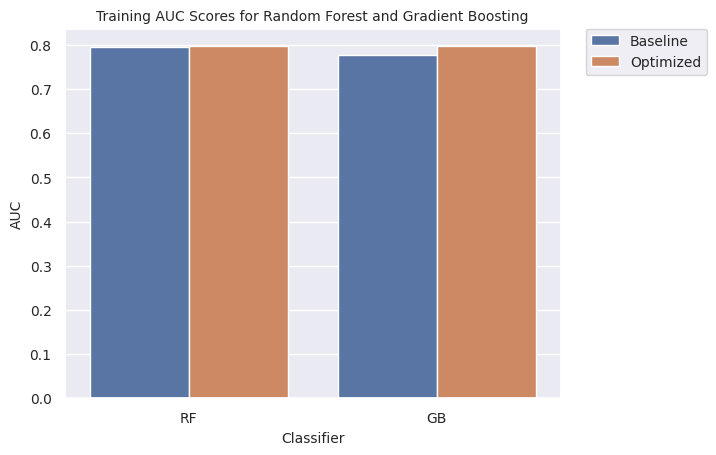

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='darkgrid')

sns.barplot(x='Classifier', y='Validation AUC', hue='Dataset', data=df_results)
plt.xlabel('Classifier', fontsize=10)
plt.ylabel('AUC', fontsize=10)
plt.title('Training AUC Scores for Random Forest and Gradient Boosting', fontsize=10)
plt.tick_params(labelsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=10)

plt.savefig('data/results/optimized_auc_scores.png')

### Picking the Best Model

In [93]:
pickle.dump(gb_random.best_estimator_, open('data/balanced/best_classifier.pkl', 'wb'), protocol=4)

## Model Evaluation

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [95]:
best_model = pickle.load(open('data/balanced/best_classifier.pkl', 'rb'))
input_cols = pickle.load(open('data/balanced/input_cols.sav', 'rb'))
df_mean_in = pd.read_csv('data/balanced/df_mean.csv', names=['col', 'mean_val'])
scaler = pickle.load(open('data/balanced/scaler.sav', 'rb'))

In [96]:
# Load the data
df_train = pd.read_csv('data/balanced/train.csv')
df_valid = pd.read_csv('data/balanced/valid.csv')
df_test = pd.read_csv('data/balanced/test.csv')

In [97]:
# Fill missing values
df_train = fill_missing_values(df_train, df_mean_in, input_cols)
df_valid = fill_missing_values(df_valid, df_mean_in, input_cols)
df_test = fill_missing_values(df_test, df_mean_in, input_cols)

# Create X and y matrices
X_train = df_train[input_cols].values
X_valid = df_valid[input_cols].values
X_test = df_test[input_cols].values

y_train = df_train['Y_LABEL'].values
y_valid = df_valid['Y_LABEL'].values
y_test = df_test['Y_LABEL'].values

# Transform the data
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)
X_test_tf = scaler.transform(X_test)

Prediction Probabilities

In [98]:
y_train_preds = best_model.predict_proba(X_train_tf)[:, 1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:, 1]
y_test_preds = best_model.predict_proba(X_test_tf)[:, 1]

In [99]:
thresh = 0.5

print("Training: ")
train_acc, train_recall, train_precision, train_specificity, train_f1, train_auc = generate_metrics(y_train, y_train_preds, thresh)

print("Validation: ")
valid_acc, valid_recall, valid_precision, valid_specificity, valid_f1, valid_auc = generate_metrics(y_valid, y_valid_preds, thresh)

print("Testing: ")
test_acc, test_recall, test_precision, test_specificity, test_f1, test_auc = generate_metrics(y_test, y_test_preds, thresh)

Training: 
Accuracy: 0.756
Recall: 0.648
Precision: 0.826
Specificity: 0.863
F1 Score: 0.726
AUC: 0.817


Validation: 
Accuracy: 0.755
Recall: 0.649
Precision: 0.824
Specificity: 0.861
F1 Score: 0.726
AUC: 0.797


Testing: 
Accuracy: 0.743
Recall: 0.618
Precision: 0.824
Specificity: 0.868
F1 Score: 0.707
AUC: 0.792




### ROC Curve

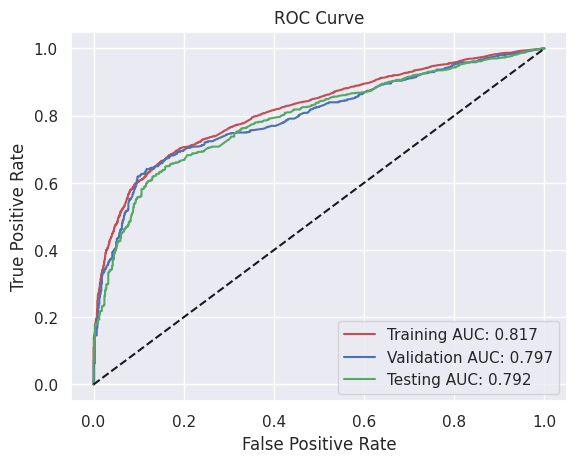

<Figure size 640x480 with 0 Axes>

In [100]:
from sklearn.metrics import roc_curve

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

plt.plot(fpr_train, tpr_train, 'r-', label='Training AUC: %.3f' % auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-', label='Validation AUC: %.3f' % auc_valid)
plt.plot(fpr_test, tpr_test, 'g-', label='Testing AUC: %.3f' % auc_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

plt.savefig('data/results/roc_curve.png')

## Conclusion

In this project, we aimed to predict the likelihood of a customer subscribing to a term deposit using various machine learning models. We performed extensive data preprocessing, feature engineering, and model evaluation to achieve our goal. Here are the key steps and findings:

1. **Data Preprocessing and Feature Engineering**:
    - We handled missing values, encoded categorical variables, and scaled numerical features.
    - We balanced the training, validation, and test sets to ensure fair model evaluation.

2. **Model Training and Evaluation**:
    - We trained and evaluated several baseline models, including Logistic Regression, Random Forest, K-Nearest Neighbors, and Gradient Boosting.
    - We used metrics such as Accuracy, Recall, Precision, Specificity, F1 Score, and AUC to evaluate model performance.

3. **Hyperparameter Tuning**:
    - We performed hyperparameter tuning using Randomized Search Cross-Validation for Random Forest and Gradient Boosting models.
    - The optimized models showed improved performance compared to the baseline models.

4. **Model Selection**:
    - We selected the best model based on performance on the validation set. The Gradient Boosting Classifier with optimized hyperparameters was chosen as the final model.

5. **Model Evaluation**:
    - The final model was evaluated on the test set, and it achieved an AUC of 0.792, indicating good predictive performance.


Overall, the project demonstrated the effectiveness of machine learning models in predicting customer behavior. The Gradient Boosting Classifier, with its ability to handle complex relationships in the data, proved to be the best model for this task. Future work could involve further feature engineering, exploring additional models, and deploying the model for real-time predictions.